Dependecies: Add your Dependencies here

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
rcParams['figure.figsize']= 10,10

Read the dataset from the CSV file

In [ ]:
dic = {'Serious_Dlq_in_2yrs':0,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
data = pd.read_csv('/content/credit_scoring_sample.csv')
data
# print(data.shape)
data.head()

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0


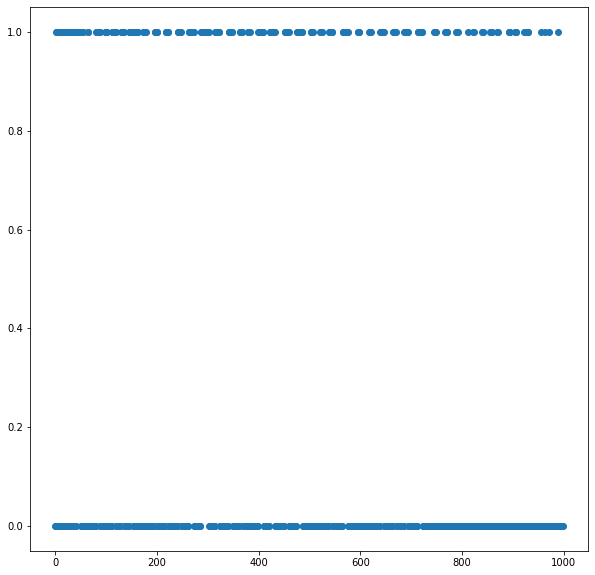

In [ ]:
plt.scatter(data.index , data['Serious_Dlq_in_2yrs'])

plt.show()

In [ ]:
y = 'Serious_Dlq_in_2yrs'
print(data[y].value_counts().sort_values())

1    300
0    699
Name: Serious_Dlq_in_2yrs, dtype: int64


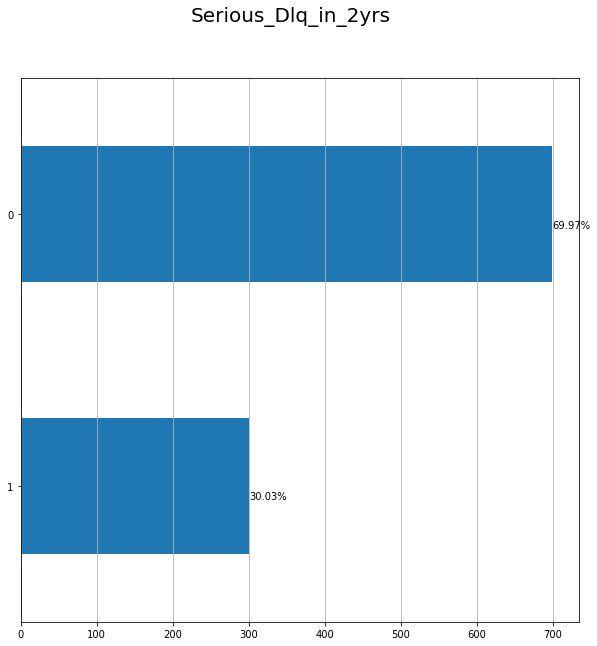

In [ ]:
ax = data[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [ ]:
data.isna().sum().sum()

209

In [ ]:
# Handle the NaN values
data.fillna(data.mean(), inplace=True)
data.isna().sum()
print(data.shape)

(999, 8)


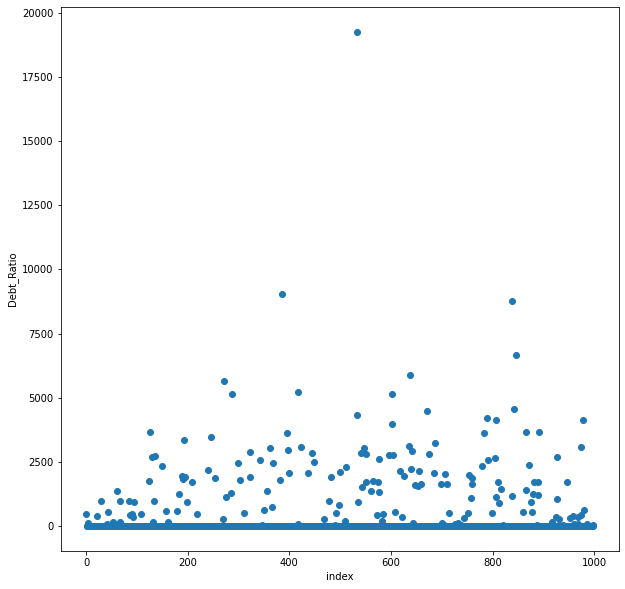

<Figure size 1440x720 with 0 Axes>

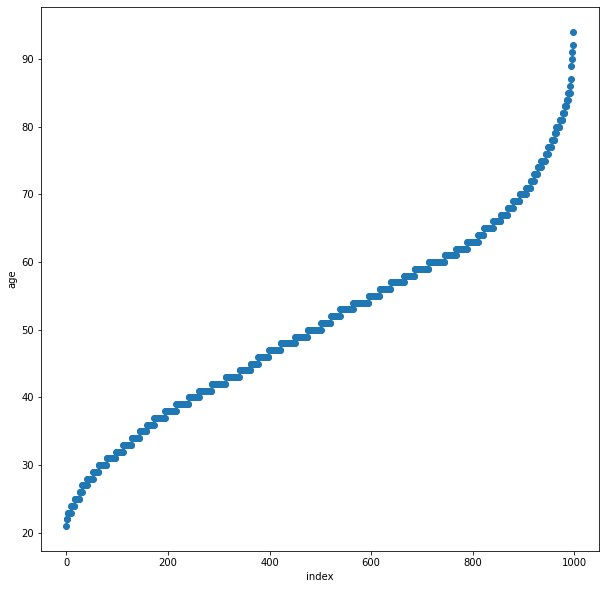

<Figure size 1440x720 with 0 Axes>

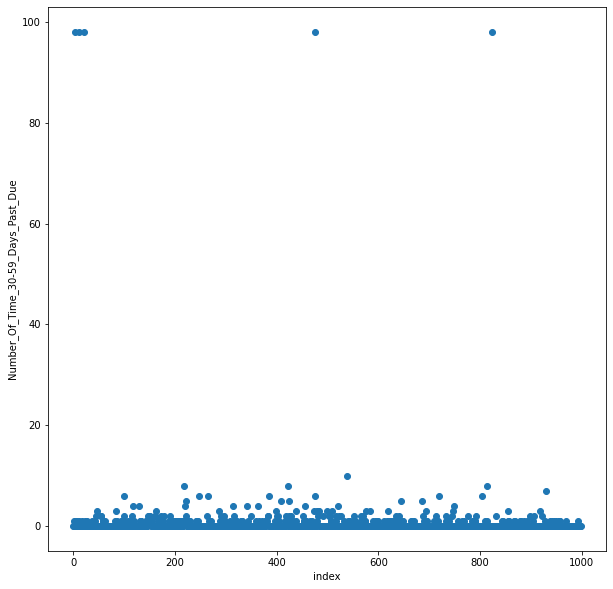

<Figure size 1440x720 with 0 Axes>

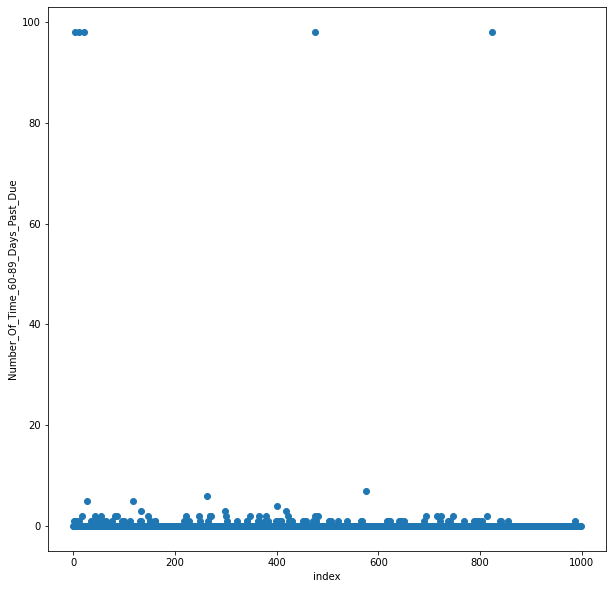

<Figure size 1440x720 with 0 Axes>

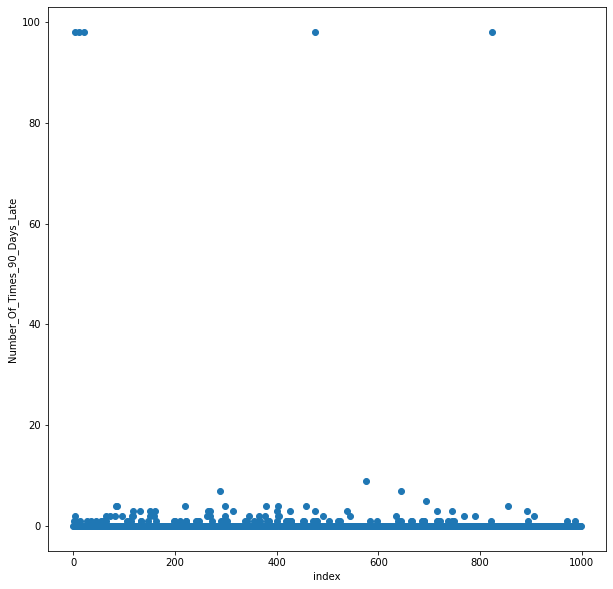

<Figure size 1440x720 with 0 Axes>

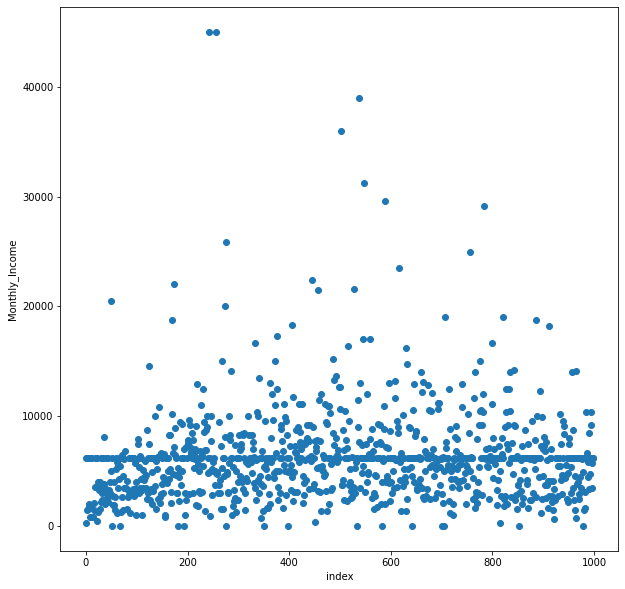

<Figure size 1440x720 with 0 Axes>

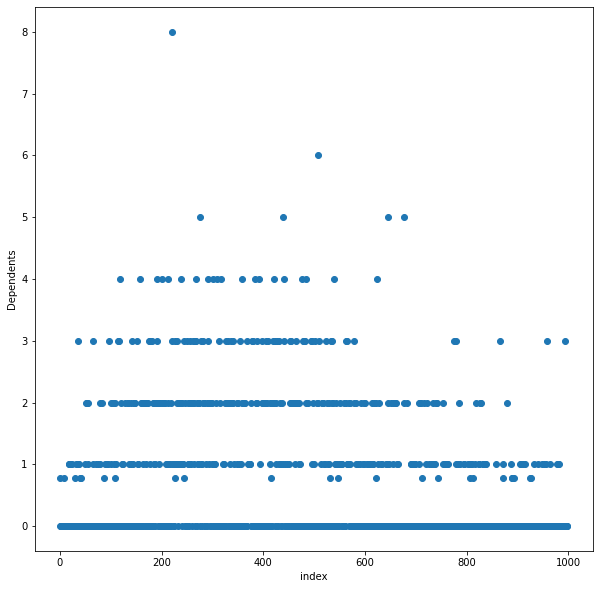

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Visualize the distribution of data for every feature
for x in data.columns:
  if x != "Serious_Dlq_in_2yrs":
    plt.xlabel("index")
    plt.ylabel(x)
    plt.scatter(data.index,data[x])
    plt.figure(figsize=(20,10))
    plt.show()
    print('\n')

**Train the Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
# seperate depedendent and independent variables from the dataset
X = data.iloc[:,1:].values #indep.
y = data.iloc[:,0:1].values #dep.



In [ ]:
# define paramerts for the random forest
parameters = {'max_features': [1, 2, 4], 'max_depth': [2,3,4,5]}
rf = RandomForestClassifier(n_estimators=100, max_features=1, max_depth=3)

**Cross Validation**

In [ ]:
# perform cross validation

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
for train_index, test_index in skf.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train.ravel())
    lst_accu_stratified.append(rf.score(X_test, y_test))
lst_accu_stratified

[0.805, 0.78, 0.77, 0.81, 0.7839195979899497]

In [ ]:
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(X_train, y_train.ravel()) 
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 2}


In [ ]:
#Get the best score from the grid search
print(grid_search.best_score_) 

0.8242001488095239


In [ ]:
clf = grid_search.best_estimator_
clf.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf.score(X_test,y_test)

0.8040201005025126

In [ ]:
a = clf.predict(X_test[2:3,:])
print(a, y_test[2:3,:])

[1] [[1]]


In [ ]:
# from sklearn.datasets import make_friedman1
# from sklearn.ensemble import GradientBoostingRegressor
# X, y = make_friedman1()
# clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)
# plot_partial_dependence(clf, X, [0, 1,2]) 
# y

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.2263742 , 0.22078891, 0.22820315, 0.22116728, 0.23010859,
        0.25340309, 0.2246057 , 0.23224988, 0.25546899, 0.23157945,
        0.24124293, 0.23533268]),
 'mean_score_time': array([0.01684384, 0.01721349, 0.01528535, 0.01734328, 0.01606021,
        0.01625195, 0.01591191, 0.01606345, 0.01627417, 0.016536  ,
        0.01620178, 0.01389675]),
 'mean_test_score': array([0.81661086, 0.81915923, 0.81595982, 0.81934524, 0.82161458,
        0.81791295, 0.81941964, 0.82126116, 0.82217262, 0.8172061 ,
        0.82319568, 0.81850818]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, 

In [ ]:
f= data.columns
f[1:]

Index(['Debt_Ratio', 'age', 'Number_Of_Time_30-59_Days_Past_Due',
       'Number_Of_Time_60-89_Days_Past_Due', 'Number_Of_Times_90_Days_Late',
       'Monthly_Income', 'Dependents'],
      dtype='object')

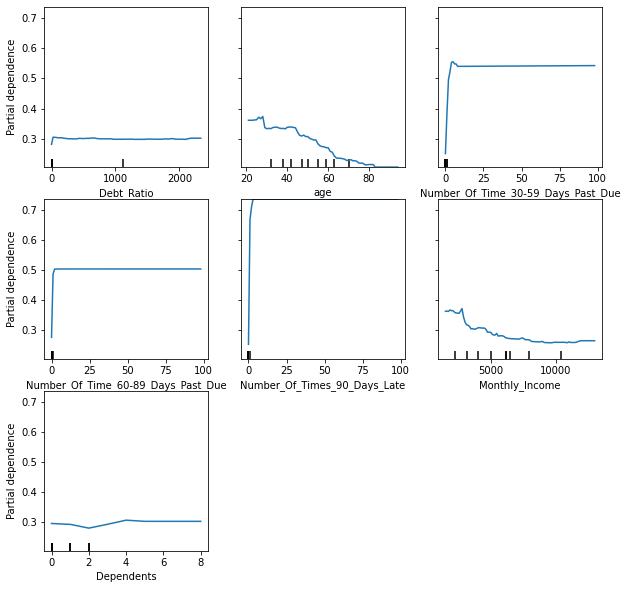

In [ ]:
# Find the feature which has the weakest impact in Random Forest Model
from sklearn.inspection import plot_partial_dependence
features = [0,1,2,3,4,5,6]
plot_partial_dependence(clf,X,features,feature_names= f[1:])


In [ ]:
clf.feature_importances_

array([0.07077535, 0.12968003, 0.21476083, 0.14519785, 0.31550347,
       0.10220667, 0.02187579])

In [ ]:
pd.DataFrame({'feat': f[1:],
              'coef': clf.feature_importances_}).sort_values(by='coef', ascending=True)

,feat,coef
6,Dependents,0.021876
0,Debt_Ratio,0.070775
5,Monthly_Income,0.102207
1,age,0.129680
3,Number_Of_Time_60-89_Days_Past_Due,0.145198
2,Number_Of_Time_30-59_Days_Past_Due,0.214761
4,Number_Of_Times_90_Days_Late,0.315503


Feature ranking:
1. feature 4 (0.315503)
2. feature 2 (0.214761)
3. feature 3 (0.145198)
4. feature 1 (0.129680)
5. feature 5 (0.102207)
6. feature 0 (0.070775)
7. feature 6 (0.021876)


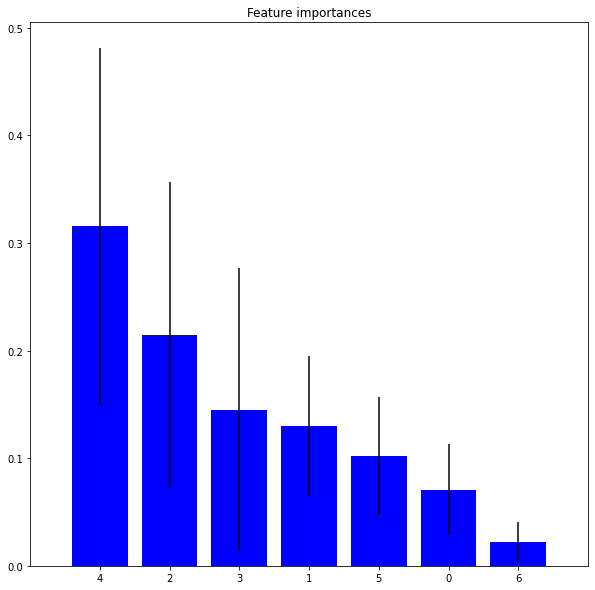

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Perform bagging classification using decision trees as the base classifier


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [ ]:

# get a list of models to evaluate
def get_models():
 param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
 models= []
 clf = tree.DecisionTreeClassifier()
 model_1 = GridSearchCV(BaggingClassifier(clf, n_estimators=2, bootstrap=True), param_grid, scoring = 'roc_auc')
 model_2 = GridSearchCV(BaggingClassifier(clf, n_estimators=3, bootstrap=True), param_grid, scoring = 'roc_auc')
 model_3 = GridSearchCV(BaggingClassifier(clf, n_estimators=4, bootstrap=True), param_grid, scoring = 'roc_auc')
 models.append( model_1)
 models.append( model_2)
 models.append( model_3)
 return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 scores = cross_val_score(model, X, y, cv=5)
 return scores

In [ ]:
# Summarize the performance by getting mean and standard deviation of scores

results = []
names = ["model_1", "model_2", "model_3"]
standard_deviations =[]
models = get_models()
for i in range (0,3):
 scores = evaluate_model(models[i], X, y.ravel())
 results.append(scores)
 msg = "%s: %f (%f)" % (names[i], scores.mean(), scores.std())
 standard_deviations.append(scores.std)
 print(msg)
 


model_1: 0.667193 (0.115203)
model_2: 0.752629 (0.056928)
model_3: 0.671756 (0.166596)


[array([0.60404762, 0.7485119 , 0.7575    , 0.75738095, 0.46852518]), array([0.71404762, 0.84970238, 0.77      , 0.74720238, 0.68219424]), array([0.76928571, 0.69232143, 0.8       , 0.75113095, 0.34604317])]


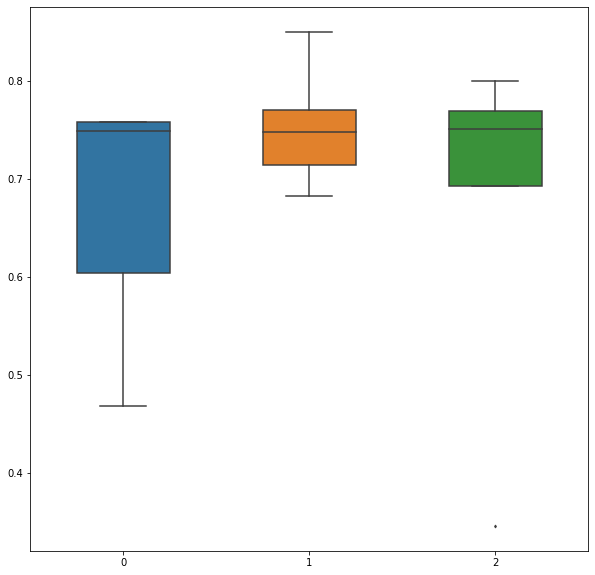

In [ ]:
# Plot the model performance for comparison using boxplot
# fig = plt.figure()
# fig.suptitle('Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()
print(results)
sns.boxplot( data = results, width = 0.5, fliersize= 2)



In [ ]:
parameters = {'n_estimators':[2,3,4]}
grid_search_bag= GridSearchCV(BaggingClassifier(), parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search_bag.fit(X_train, y_train.ravel()) 
num_estimators =grid_search_bag.best_params_['n_estimators']
print(num_estimators)

4


[array([0.76928571, 0.69232143, 0.8       , 0.75113095, 0.34604317]), [0.805, 0.78, 0.77, 0.81, 0.7839195979899497]]


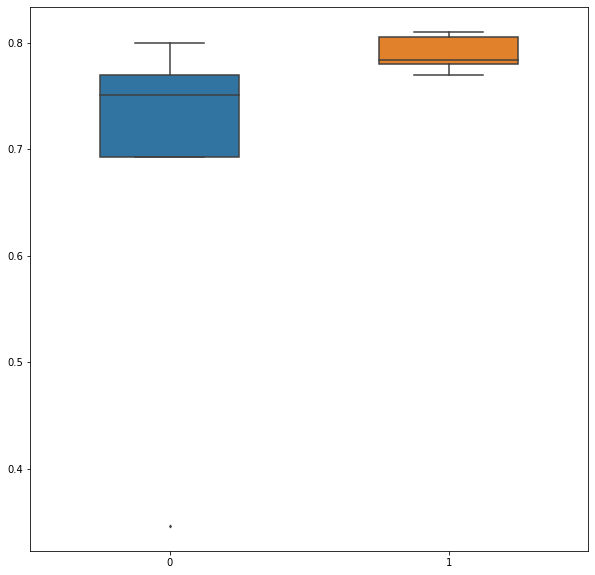

In [ ]:
# Compare the best performance of bagging with random forest
num_est =[2,3,4]
index = num_est.index(num_estimators)
results_bag_rf= [results[index]]
results_bag_rf.append(lst_accu_stratified)
sns.boxplot( data = results_bag_rf, width = 0.5, fliersize= 2)
print(results_bag_rf)

References:-


*   [Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
*   [Seaborn](https://https://https://seaborn.pydata.org/)
*   [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
*   [Stratified Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
*   [Grid Search](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
*   [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 
*   [Cross Val Score](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)









